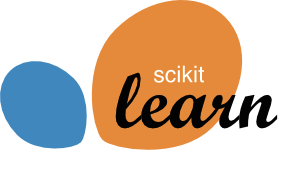

# Scikit-Learn Overview
***
## What is Scikit-Learn?
A Python library for machine learning, its name comes from its original function as a SciPy tool kit (Scikit) for machine learning (Learn).

The library contains supervised and non-supervised algorithms as well as convenience functionality to allow you to more easily manipulate your data, like for example, ways to easily split up your datasets into testing, training and validation sets.
But that is not to say that it acts as an alternative to numpy or pandas, but rather it provides functionality that works with these other packages.

[Direct-link to scikit-learn website](https://scikit-learn.org/stable/index.html)
***
## How Does Scikit-Learn work?
Across the models implemented in Scikit-Learn Estimators are the main API used, they are the objects that fit data to the model whether it be for supervised or non-supervised 
algorithms. 

To demonstrate the operation of sklearn I'll break this out across a few steps:
1) Creating an estimator from a model e.g. LinearRegression().
2) Create and shape some data to fit the estimator.
3) Predict values not fitted to the estimator.
4) Visualise the data used to fit and the estimator's predictions.

In the next cell a simple example is shown where a estimator variable called 'lin_reg' is defined for performing some linear regression.

In [1]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

***
### 'Shape' of the data
With an estimator object initialised, it needs to be fitted to some data to be useful and be able to predict values.

All data inputted to sklearn must be 2D in shape (though there is an exception to this when fitting, as you can have the response variable as 1D), this essentially means an array of array's where each in the index of the outer array essentially represents a row of data.

``
[[1,2,3]
,[1,2,3]]
``

This is handled normally in pandas due to how it represents data natively in dataframes with rows and columns, however in the case of taking a list or numpy array it may be necessary to first reshape the data before using it to fit your model/estimator.

In the next cell, a Python list is converted to an array and then reshaped so it is 2D.

In [2]:
import numpy as np

X = [1,2,3,4]
y = [1,2,3,4]

X = np.array(X) #Change X to numpy array and reshape
X = X.reshape(-1,1) #Reshape so it is in format [[1],[2],...]

lin_reg.fit(X,y) #equivalent to >>>lin_reg.fit([[1],[2],[3],[4]],[1,2,3,4])

test = str(X)

print(f"Input X shape:{X}\nInput y shape:{y}")

Input X shape:[[1]
 [2]
 [3]
 [4]]
Input y shape:[1, 2, 3, 4]


***
### Predicting values not used to fit
With the estimator defined and fitted using X and y, we can now use it estimate future values, a very simple linear input was used so the predictions here will be pretty obvious.

And we can see by getting the coefficient that it is a multiple of 1, so any value we want to predict will be scaled by 1.

And any line will intercept the x and y-axis at 0.

In [3]:
print(f"Predicted value for one we have already fitted with; 3 = {lin_reg.predict([[3]])}")
print(f"Predicting with values not fitted with; 5 = {lin_reg.predict([[5]])}, 6 = {lin_reg.predict([[6]])}, 10 = {lin_reg.predict([[10]])}")
print(f"\nCoefficient {lin_reg.coef_}\nIntercept {lin_reg.intercept_}")

Predicted value for one we have already fitted with; 3 = [3.]
Predicting with values not fitted with; 5 = [5.], 6 = [6.], 10 = [10.]

Coefficient [1.]
Intercept 0.0


***
### Visualising the Estimator
With the fitted data and the estimator to provide predictions, the data can be plotted simply using matplotlib.

Taking the points the estimator was fitted with (X and y) a few initial points will be plotted, these are the known values and will be plotted using black dots.

Then some values will be predicted with the estimator, these will be pretty simple but a few incrementally larger steps will be taken, these points will be plotted using red dots.

Lastly using the estimator's coefficient and intercept (and using numpy's linspace function to generate some numbers), we will create some data to show the line that any points should follow, and will overlay the points using a blue line to show this.

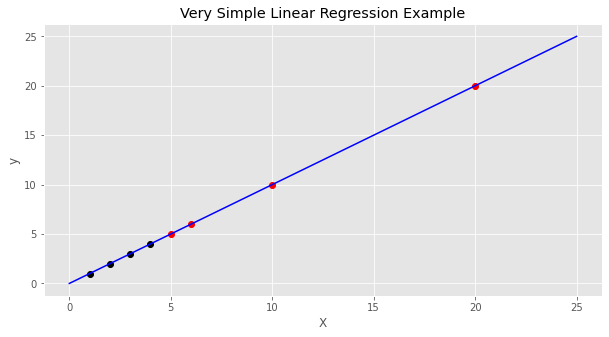

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') #use this style for rest of notebook
plt.figure(figsize=(10,5)) #set figure size

#title and label axis'
plt.title('Very Simple Linear Regression Example')
plt.xlabel('X') 
plt.ylabel('y')

plt.plot(X,y,'ko') #plot points we know as black dots

X2 = np.array([5,6,10,20]).reshape(-1,1) #Create a new X2 variable, this will represent values to predict
y2 = lin_reg.predict(X2) #Create y2 to hold predicted values
plt.plot(X2,y2,'ro') #plot new data with red dots

X3 = np.linspace(lin_reg.intercept_,25,26) #Create new X3 variable, this will start with model/estimators intercept
y3 = X3*lin_reg.coef_ + lin_reg.intercept_ #y3 is X3 times the coefficient(1.0) plus the intercept(0.0)
plt.plot(X3,y3, 'b-') #plot the line to overlay the points

plt.show()

***
## Evaluating Estimators

There are quite a few options for evaluating how good your estimator/model is at predicting and a detailed documentation can be found [here in the sklearn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

Here a few examples will be stepped through which can be easily used in determining how good your model is.

### Score

The score function can be used to get the $ R^2 $ of your model which takes in a feature dataset (X or X_train as will be used in later examples) and it's asssociated target dataset (y or y_train as will be used in later examples).

As you can see in below example we get a score of 1.0, in a real dataset this would likely be an indication of overfitting, and for demonstration purposes this doesn't really work well, so lets redo the fit for lin_reg and this time jitter the values about a little so it's not so exactly linear.

In [5]:
print(f"Suspiciously good R-squared score: {lin_reg.score(X,y)}")

#refit model but make values a bit rougher
X = [0.5,2,3,4]
y = [1.1,0.2,4,7]

X = np.array(X) #Change X to numpy array and reshape
X = X.reshape(-1,1) #Reshape so it is in format [[1],[2],...]

lin_reg.fit(X,y) #equivalent to >>>lin_reg.fit([[1],[2],[3],[4]],[1,2,3,4])

print(f"After adjusting values around score is: {lin_reg.score(X,y)}")

Suspiciously good R-squared score: 1.0
After adjusting values around score is: 0.7246841243136131


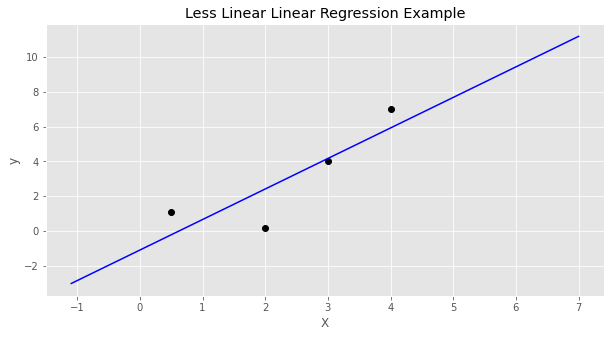

In [6]:
plt.figure(figsize=(10,5)) #set figure size
plt.title('Less Linear Linear Regression Example')
plt.xlabel('X') 
plt.ylabel('y')

plt.plot(X,y,'ko') #plot points we know as black dots

Xline = np.linspace(lin_reg.intercept_,7,9) #Create new X3 variable, this will start with model/estimators intercept
yline = Xline*lin_reg.coef_ + lin_reg.intercept_ #y3 is X3 times the coefficient(1.0) plus the intercept(0.0)
plt.plot(Xline,yline, 'b-') #plot the line to overlay the points

After seeing the data both ways now it's pretty clear why the score is worse, as you can see in last plot, the blue line represents the equation of the line, so the score, the $ R^2 $ of 0.72 makes sense as the points are generally centered around the line but are not exactly on it.

***
## Mean Absolute Error (MAE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

Getting the mean absolute error is another way of evaluating your model, it tells you how far off your prediction is on average from the actual. Where the lower the MAE the better, as it means your predictions are closer to the actual.

It's a fairly trivial calculation to perform, but sklearn has a package for it which is very convenient.

Please note in the below example in a practical setting, you would likely also be performing this on a test set of data as outputed from train_test_split(), this will be covered later in the notebook in the Algorithm demonstrations, as there will be a proper dataset pulled in there.

In [7]:
from sklearn.metrics import mean_absolute_error

y_pred = lin_reg.predict(X)
print(f"MAE is {mean_absolute_error(y_pred,y)}, which given the scale of our values is really not very good.")

MAE is 1.194392523364486, which given the scale of our values is really not very good.


***
## Cross Validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Cross validation is a way to test the robustness of the model built upon the available dataset as it reduces the risk that the training set was split in such a way that when tested it isn't truly representative. Cross validation helps to identify how the model might behave against unseen data not part of the currently available dataset.

It works by splitting the dataset into random groups, it then iterates over these using one as the test set and the remaining as the training sets and it scores the model based on this. On repeat iterations it selects a different group as the training set, the final score is then the average of each of these scores.
This process may be repeated further to randomly split the data into different groups and go again with overall score being the average across these averages.

***
## Data Pre-Processing - Scaling
https://scikit-learn.org/stable/modules/preprocessing.html

One consideration which hasn't been mentioned above is pre-processing data prior to fitting a model with it. Why this might need to be done is down to the scale of the values across different features/variables, you might have a significant feature which goes from 0 to 1 be overshadowed by a less significant feature which has a much larger range of values, say, 0 to 100000. The risk here is that a less significant feature which may infact have a negligible impact on the target, is treated as being more significant due to the larger range of values.

Scikit-Learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) takes in a dataset and scale's the values in it, in the dataset it returns (as a numpy array) each feature will have a mean of 0 and a standard deviation and variance of 1. This gets rid of the risk described in having the data in features at different scales.

In practice when training models, the train dataset scaler will be fitted without the test dataset, though this may be a little counterintuitive. The test dataset will later be scaled with that scaler but the resulting scaled test dataset will not have mean of 0. 

A simple example of scaling is shown below, in practice I see a mean value that is incredibly small, order of magnitude $e^-17$. This is so small it is practically 0, and likely it is due to some recurring number not evaluating neatly to 0, but for all intents and purposes it is practically 0.

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler

x_example_array = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)

scaler = StandardScaler()
scaler.fit(x_example_array)
x_scaled_example_array = scaler.transform(x_example_array)

print(f"Before scaling mean is: {x_scaled_example_array.mean():.2f}\nBefore scaling standard deviation is: {x_scaled_example_array.std():.2f}\n")
print(f"Scaled mean is: {x_scaled_example_array.mean():.2f}\nScaled standard deviation is: {x_scaled_example_array.std():.2f}")

Before scaling mean is: -0.00
Before scaling standard deviation is: 1.00

Scaled mean is: -0.00
Scaled standard deviation is: 1.00


## Feature Selection

When doing feature selection there are a number of options: 
* PCA (Principal Componenet Analysis) can be used though from my reading seems to be controversial in how effective it is (and it confused me sufficiently that after spending an hour reading up on it decided not to implement as wouldn't do it justice) 
* RFE which will be explored in this notebook and further explained.
* Univariate selection which uses statistical tests to determine the features with strongest relationship to the target variable

Recursive Feature Elmination recursively removes features, builds the model with the remaining ones and ultimately returns which features resulted in the best model score. It will try out all the combinations and tell you the best features which is exactly what is desired and is pretty logical approach, e.g. if you want to find out what is the best number of features and the most significant ones, simply try them all out. Not having much of a statistical background this makes it the most attractive to me as it is a straightforward and understandable approach, and from reading up on the other options listed above makes it the obvious choice for my first foray into feature selection.

One potential issue I can see with this approach is the potential computational costs if performing this on a very large dataset with many features.

# Algorithm Demonstration

***
## Lasso Model

In this section Lasso algorithm will be explored, but first a dataset needs to be chosen and explored a bit to familiarise with the structure of the dataset.

### Selecting a dataset

For this the California Housing Dataset from Scikit Learn will be used. It's an inbuilt dataset to the sklearn  datasets package, which means csv files for holding the data won't be necessary.

In [9]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd 

#get the dataset object, set as_frame=True to get pandas dataframe returned too
cali_house_data = fetch_california_housing(as_frame=True)

In [10]:
print(cali_house_data['DESCR'])
print(cali_house_data.keys())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

***

### Exploring the dataset
First print the dataset object itself to understand how it's structured, to do so pprint is used to better format the output, this gives us a pretty good idea of how the data is structured within but to make sure the object keys themselves are printed.

What the dataset also conveniently tells us (which won't be the case a lot of the time) is what our features are and what the target is.

By printing out the keys to the dataset how it can be used starts to become clear, where each key represents a list of values (with the exception of 'DESCR' which has a textual description of the dataset), in the next cell these will start to be stitched together to give a pandas dataframe to explore the dataset further and see if there are any potential issues like NULL values to account for. 
***

In [11]:
cali_house_df = cali_house_data['frame']
cali_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
#show info on the dataframe, this will determine whether we have null values and column datatypes
cali_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


***
Looking at the table head and it's info tells us that we have no null values - this is useful to know as it means imputing values is not necessary.
That all columns in the dataframe are a numeric (float) type.
It also shows there is 20640 rows total, so not an insubstantial dataset, especially when compared against the Iris dataset - this may have a consequence where any scatterplots might become very difficult to distinguish due to the number of points

***

Next to get an idea of what data is in the dataframe some simple hist plots are done, this can conveniently be done directly against the pandas dataframe.

Dataset target (what we want to predict)- ['MedHouseVal']
Dataset features (what we can use to predict the target) - ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


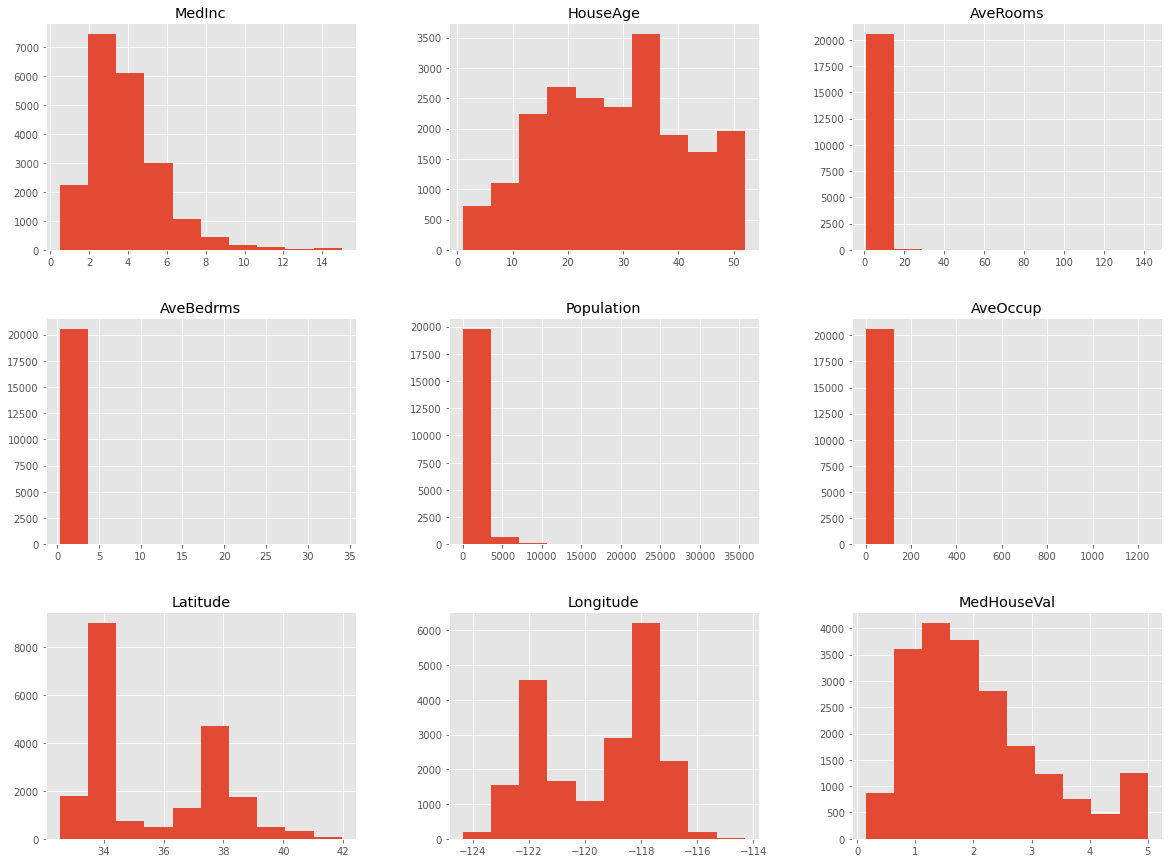

In [13]:
#plot values in the dataframe with histogram
cali_house_df.hist(figsize=(20,15))

print(f"Dataset target (what we want to predict)- {cali_house_data.target_names}")
print(f"Dataset features (what we can use to predict the target) - {cali_house_data.feature_names}")
plt.show()

In [14]:
'''
Commented out seaborn pairplot as too many columns to be practical
'''
#import seaborn as sns
#sns.pairplot(cali_house_df)

'\nCommented out seaborn pairplot as too many columns to be practical\n'

***
By showing the target and features from the dataset alongside the histograms can now begin to see some relationships and potentially what might have the strongest influence on the target MedHouseVal.
Looking at the above histograms doesn't tell a whole lot, and certainly doesn't describe any of how strongly any of the features may influence the target, however it does give an idea of the distributions of values, namely MedHouseVal tends to have most houses in the region of 150,000, with decreasing either side of that (with the exception of a spike in the region approaching 500,000 (maybe they went to a few rich neighbourhoods when gathering this data)

***
### Splitting our dataset to fit the model
Next the dataset is going to be split into testing and training datasets

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#exclude target column for X
X = cali_house_df.drop('MedHouseVal',axis=1)

#exclude everything but target column for y
y = cali_house_df[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)#set a radom state for consistency when testing

In [16]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn import linear_model

#initialise model
lasso_reg = linear_model.Lasso(alpha=1)
#fit with training data
lasso_reg.fit(X_train_scaled,y_train)
#get R^2 score 
print(f"Model Score: {lasso_reg.score(X_test_scaled,y_test)}")
y_pred = lasso_reg.predict(X_test_scaled)
print("\nNote: For the MAE, a value of 1 represents 100,000 dollars, so while the MAE may not look too bad it is off by over 90,000 dollars")
print(f"Model MAE: {mean_absolute_error(y_pred,y_test)}")

Model Score: -0.0008846708572047834

Note: For the MAE, a value of 1 represents 100,000 dollars, so while the MAE may not look too bad it is off by over 90,000 dollars
Model MAE: 0.9119341537918395


***
### Interpreting basic model evaluation
Using Lasso model with this dataset, we get a very poor result, so we will next explore how we could improve this by tuning it's hyperparemeters.

For Lasso it's alpha argument is by default set equal to 1, by setting it to 0 it acts in an equivalent manner to Linear Regression, so that's what will be tried next to see how the two compare and before doing further tuning to determine what is the best value to set for alpha.

Note: there are a lot of warnings upcoming, in hindsight this is scikit warning that we are better off using LinearRegression estimator instead of setting the alpha of a lasso estimator to 0.

In [18]:
#Supressing warnings as will see a lot of them with alpha = 0
import warnings
warnings.filterwarnings('ignore')

In [19]:
#with alpha set to 0 should behave same as linear regression model
lasso_reg = linear_model.Lasso(alpha=0) 
#fit model
lasso_reg.fit(X_train_scaled,y_train)
#get score
lasso_reg.score(X_test_scaled,y_test)
print(f"Model Score: {lasso_reg.score(X_test_scaled,y_test)}")
y_pred = lasso_reg.predict(X_test_scaled)

print(f"Model MAE: {mean_absolute_error(y_pred,y_test)}")

Model Score: 0.60089831159643
Model MAE: 0.537892792364812


***
Now that we've gotten a few warnings against what we've just done, as it reccomends that instead of setting alpha to 0 you are likely better of to either use LinearRegression or Ridge models instead.

But we do indeed see a much better score and Mean Absolute Error.

At this point we know that a lower alpha at 0 is better than the default of 1, but to properly determine what is the best alpha we will try tuning the hyperparameters.



In [20]:
alphas=np.arange(0,1,0.01)
mae_list = []
score_list = []
for a in alphas:
    lasso_reg = linear_model.Lasso(alpha=a) 
    #fit model
    lasso_reg.fit(X_train_scaled,y_train)
    #get score
    score = lasso_reg.score(X_test_scaled,y_test)
    score_list.append(score)
    y_pred = lasso_reg.predict(X_test_scaled)
    mae_list.append(mean_absolute_error(y_pred,y_test))

Text(0, 0.5, 'R-Squared')

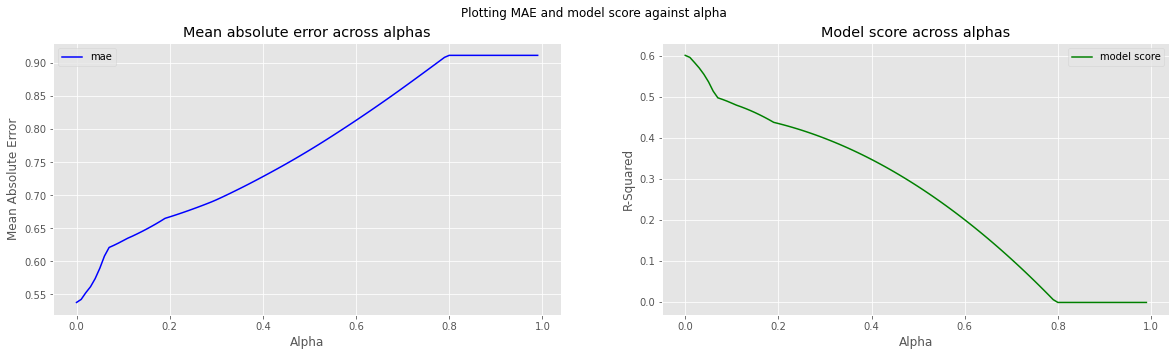

In [21]:
#plt.figure(figsize=(15,5))
#plt.title('MAE and Model Score at different Alphas')


fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Plotting MAE and model score against alpha')

#plot data
sns.lineplot(ax=ax[0],x=alphas,y=mae_list, label='mae', color='blue')
sns.lineplot(ax=ax[1],x=alphas,y=score_list, label='model score', color='green')

#add titles, labels
ax[0].set_title("Mean absolute error across alphas")
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Mean Absolute Error')
ax[1].set_title("Model score across alphas")
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('R-Squared')


## Switching to LassoCV
The above can be done a lot more simply with [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) so to demonstrate how this works will use this from here on instead of Lasso. 
LassoCV will allow us to specify a range of alpha's and it will tell us the best alpha that gives the best score, it also gives a way to cross-validate the input data so for this algorithm I won't explicitly explore cross-validation but know that it is happening in the background and so will give greater confidence our result is not biased.

***


In [22]:
lasso_reg = linear_model.LassoCV()
#fit model
lasso_reg.fit(X_train_scaled,y_train)
#get score
lasso_reg.score(X_test_scaled,y_test)
print(f"Model Score: {lasso_reg.score(X_test_scaled,y_test)}")
y_pred = lasso_reg.predict(X_test_scaled)
print(f"Model MAE: {mean_absolute_error(y_pred,y_test)}")
print(f"LasssoCV estimator automatically picks alpha of: {lasso_reg.alpha_}")

Model Score: 0.5997150058492091
Model MAE: 0.5389967478694858
LasssoCV estimator automatically picks alpha of: 0.004247038615141491


***
The above results are certainly better than the default alpha value of 1, however it's still not as good as 0, so to do a final check to really see is alpha of 0 (and therefore LinearRegression is the more appropriate model for this dataset) the best, we will use LassoCV's alphas parameter and pass it in an array of values from 0 to 1 in steps of 0.01.
To do so numpy is needed and it's arange function.

Below you will see (in between all the warnings that is) that indeed an alpha value of 0 is best in this case, so based on the investigations here LinearRegression would be the more appropriate algorithm to use.
***

In [23]:
import numpy as np
lasso_reg = linear_model.LassoCV(alphas=np.arange(0,1,0.01))
#fit model
lasso_reg.fit(X_train_scaled,y_train)
#get score
lasso_reg.score(X_test_scaled,y_test)
print(f"Model Score: {lasso_reg.score(X_test_scaled,y_test)}")
y_pred = lasso_reg.predict(X_test_scaled)
print(f"Model MAE: {mean_absolute_error(y_pred,y_test)}")
print(f"LasssoCV estimator automatically picks alpha of: {lasso_reg.alpha_}")

Model Score: 0.60089831159643
Model MAE: 0.537892792364812
LasssoCV estimator automatically picks alpha of: 0.0


***
Finally with Lasso Regression now that we have tuned the hyperparameters and determined alpha, the coefficients are looked at, to see what are the most significant features and potentially what ones could be dropped. 

It shouldn't be necessary to drop any features in the case of Lasso as it's supposed to do it's own feature selection, however as we've found the best alpha as 0, it's not really doing any feature selection and is behaving the same as Linear Regression.

***

In [24]:
importance = lasso_reg.coef_
#print out the coefficient of each feature
for i,v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Coefficient: {v:.5f}')

Feature: MedInc, Coefficient: 0.83213
Feature: HouseAge, Coefficient: 0.11620
Feature: AveRooms, Coefficient: -0.25946
Feature: AveBedrms, Coefficient: 0.28961
Feature: Population, Coefficient: -0.00667
Feature: AveOccup, Coefficient: -0.04001
Feature: Latitude, Coefficient: -0.89406
Feature: Longitude, Coefficient: -0.86938


## Feature Selection with RFE

Next will try to narrow down features using RFE (Recursive Feature Elimination), this is a nice and logical if brute force approach to picking features, it works by recursively removing features until it gets to the number of features you've specified then tries different combinations, ultimately determining what the best combination is.

From getting the coefficients above, I note there are 3 features which stand apart from the rest so below I'll specify 3 features for RFE and see if it picks out the same features.

In [25]:
#Inspired by this article - https://machinelearningmastery.com/feature-selection-machine-learning-python/
from sklearn.feature_selection import RFE

#Pass model along with alpha values to rfe, 3 features to narrow down to
rfe = RFE(linear_model.LassoCV(alphas=np.arange(0,1,0.01)),  n_features_to_select=3)
#Fit with training data
rfe.fit(X_train_scaled,y_train)
#Filter X.columns using rfe.support_
print(X.columns[rfe.support_])

Index(['MedInc', 'Latitude', 'Longitude'], dtype='object')


Earlier assumption was proven correct, so now let's see what model score we can get with just these features.

In [26]:
#Filter numpy array to get just the features of interest - this single line of code took ages to get right, finally figured out comma denotes columns
# to select so suppling in true false list gives desired output
X_train_new = X_train_scaled[:,rfe.support_]
X_test_new = X_test_scaled[:,rfe.support_]
lasso_reg = linear_model.LassoCV(alphas=np.arange(0,1,0.01))
#fit model
lasso_reg.fit(X_train_new,y_train)
#get score
lasso_reg.score(X_test_new,y_test)
print(f"Model Score: {lasso_reg.score(X_test_new,y_test)}")
y_pred = lasso_reg.predict(X_test_new)
print(f"Model MAE: {mean_absolute_error(y_pred,y_test)}")
print(f"LasssoCV estimator automatically picks alpha of: {lasso_reg.alpha_}")


Model Score: 0.5758323259870392
Model MAE: 0.5559135323007227
LasssoCV estimator automatically picks alpha of: 0.0


Very close to the previous score with less than half the original features, which is a pretty good result, however the model score itself still leaves a lot to be desired.
With this algorithm I'm not going to further tweak and refine here as already it is getting a bit long-winded, in the next section on KNeighborsClasifier will explore feature selection in more depth and try out a different method of feature selection.

One last note here is that strictly speaking it's silly to perform feature selection on Lasso Regression as it's purpose is to pretty much determine what weighting to give to different features and so to reduce the impact of non significant features, as it more or less has feature selection baked into it. However as we've found best alpha value at 0.0 e.g. Linear Regression should have been used in the first place, picking out features has some relevance.


***
## Classification Model - K Nearest Neighbours

When performing K nearest neigbours modeling there's a couple criteria to consider.
Firstly, what features or dimensions should be used, K-Nearest Neighbours does not deal well with many features, so likely these will need to be reduced.
Secondly, how many neighbours is appropriate, to determine this will try fitting the model against different numbers of clusters and see which returns the best score.

### Dataset selection

For using this model an appropriate dataset is needed, again here sklearns datasets package will be used, this time selecting a dataset that is appropriate for a classification algorithm.

load_breast_cancer is used below, this dataset has a decent amount of features, which will likely need to be narrowed down to reduce the risk of model overfitting and hopefully improve model score.
It has two classes that are being sought for the target variable; 'benign' and 'malignant', being the types of cancer .

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

#could do same as above, bring in as dataframe but want to try the default way
breast_cancer_dataset = load_breast_cancer(as_frame=True)
breast_cancer_df = breast_cancer_dataset['frame']
#print description of dataset
print(breast_cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [28]:
print(f"Dataset feature names:\n{breast_cancer_dataset['feature_names']}")
print(f"\nDataset target names:\n{breast_cancer_dataset['target_names']}")

Dataset feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Dataset target names:
['malignant' 'benign']


***
At this point we don't actually know what 0 or 1 represents, which is 'malignant' and which is 'benign', could assume these are ordered, however we know the counts of each in the dataset from the dataset description.

In [29]:
#instead of using the pandas dataframe will instead use the numpy array but unfortunately we can't use row-wise filters like can be done with pandas
unique, counts = np.unique(breast_cancer_dataset['target'], return_counts=True) #get unique values and count using numpy's unique function
#loop over values showing count of each unique value
for i in range(len(unique)):
    print(f"{unique[i]} has count {counts[i]}")

0 has count 212
1 has count 357


This confirms the earlier assumption that the order is preserved.

In [30]:
print("Looking at Dataframe info, shows every column is float type except for the target and shows that there are no NULL's\n")
print(breast_cancer_df.info())

Looking at Dataframe info, shows every column is float type except for the target and shows that there are no NULL's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error 

<AxesSubplot:>

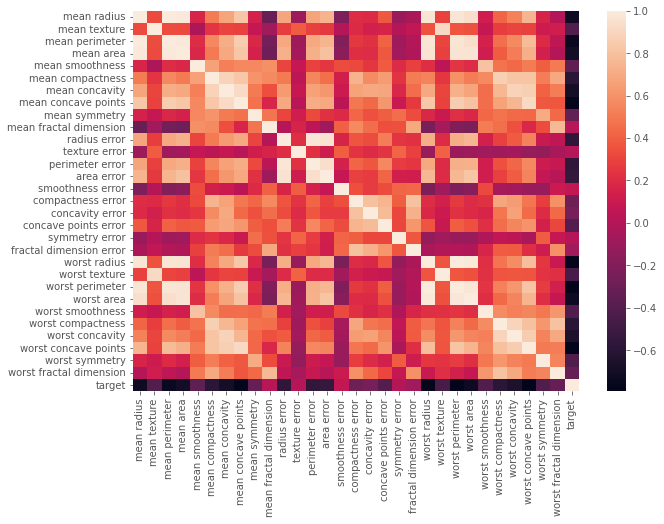

In [31]:
plt.figure(figsize=(10,7)) #set figure size
sns.heatmap(breast_cancer_df.corr()) #plot correlation heatmap for dataframe

Looking at the heatmap, some features stand out as having good correlation, such as Mean radius with Mean perimeter and Mean radius with Worst radius.

At this point it's understood what our features and target is which K neighbors classifier will be performed on, the data itself is fine and doesn't appear to need any imputing to fix missing (NULL) values.

In [32]:
#exclude target column for X
X = breast_cancer_df.drop('target',axis=1)
#X = X[['mean radius','mean texture', 'mean perimeter','mean area']]

#exclude everything but target column for y
y = breast_cancer_df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)#set a radom state for consistency when testing

### Scaling

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit model without any tuning

In [34]:
nei_class = KNeighborsClassifier()
nei_class.fit(X_train_scaled,y_train.values.ravel())
print(f"Initial model score, without doing any optomisation or tuning: {nei_class.score(X_test_scaled,y_test)}")

Initial model score, without doing any optomisation or tuning: 0.972027972027972


## Do some recursive tuning of model

In [35]:
#model_score = []
model_score_dict = {}
for i in range(1,20):
    nei_class = KNeighborsClassifier(n_neighbors=i,weights='uniform')#try uniform weight
    nei_class.fit(X_train_scaled,y_train.values.ravel())
    uniform_score = nei_class.score(X_test_scaled,y_test.values.ravel())
    
    nei_class = KNeighborsClassifier(n_neighbors=i,weights='distance')#try distance weight
    nei_class.fit(X_train_scaled,y_train.values.ravel())
    distance_score = nei_class.score(X_test_scaled,y_test.values.ravel())
    
    #if distance score is less than or equal to uniform score then will go with the default weights argument; uniform
    if(distance_score <= uniform_score):
        model_score_dict[i] = {"score": uniform_score, "weights": "uniform"}
    else:
        model_score_dict[i] = {"score": distance_score, "weights": "distance"}
    
best_neighbours = max(model_score_dict, key= lambda x: model_score_dict[x].get('score'))

print(f"From loop minimal number of neighbours which gives best score is: {best_neighbours}")
print(f"Best Score: {model_score_dict[best_neighbours]['score']}, Optimal Weight for that score: {model_score_dict[best_neighbours]['weights']}")

From loop minimal number of neighbours which gives best score is: 10
Best Score: 0.986013986013986, Optimal Weight for that score: uniform


In [36]:
model_score_dict

{1: {'score': 0.9370629370629371, 'weights': 'uniform'},
 2: {'score': 0.9440559440559441, 'weights': 'uniform'},
 3: {'score': 0.965034965034965, 'weights': 'uniform'},
 4: {'score': 0.9790209790209791, 'weights': 'uniform'},
 5: {'score': 0.972027972027972, 'weights': 'uniform'},
 6: {'score': 0.972027972027972, 'weights': 'uniform'},
 7: {'score': 0.972027972027972, 'weights': 'uniform'},
 8: {'score': 0.972027972027972, 'weights': 'uniform'},
 9: {'score': 0.9790209790209791, 'weights': 'uniform'},
 10: {'score': 0.986013986013986, 'weights': 'uniform'},
 11: {'score': 0.986013986013986, 'weights': 'uniform'},
 12: {'score': 0.986013986013986, 'weights': 'uniform'},
 13: {'score': 0.986013986013986, 'weights': 'uniform'},
 14: {'score': 0.986013986013986, 'weights': 'uniform'},
 15: {'score': 0.986013986013986, 'weights': 'uniform'},
 16: {'score': 0.986013986013986, 'weights': 'uniform'},
 17: {'score': 0.972027972027972, 'weights': 'uniform'},
 18: {'score': 0.9790209790209791, '

From recursive approach it looks like 10 neighbours is the sweet spot, however this data hasn't been validated so is susceptible to being biased, next will take a look at a more robust methodology to cross-validate the data while also doing some hyperparameter tuning.

### Model Selection functions
https://scikit-learn.org/stable/model_selection.html

Some steps done above can be more automated, for example we can replace the loop to pick out the optimal set of neighbours for our model and instead use sklearn's [GridSearchCV](https://scikit-legarn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to automate this, further we can also perform cross validation with this function also.

For this approach we need to create a dictionary of parameters to test, in the case below we will try a range of 1 to 20 neighbours and we will also test how we want to weight the neighbours, whether they are uniformly weighted or weighted based on their distance.

Secondly cross validation will be applied to the dataset using [RepeatedStratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html)

In reading up on GridSearchCV and how to implement a scaler with this approach, it introduced the concept of a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), so this will also be performed below. Pipeline's perform a sequence of transformations to prepare the data just as has already been manually done with creating the scaler, fitting it and then transforming data. Implementing a pipeline will allow us to pipe the scaling operation into the gridsearch, which when we fit it, will automatically do the scaling just as done above, along with the cross validation and hyperparameter tuning.

One strange quirk that took a while to figure out with the pipeline, is that the parameters passed into GridSearchCV need to reference the other parameters names in the pipeline, so to reference 'knn' below a double underscore needed to be added in front of every parameter to pass into the KNeighborsClassifier().

In [37]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier())])

#parameters to try out with model
parameters = {
    "knn__n_neighbors": range(1, 20),
    "knn__weights": ["uniform", "distance"]
}

#cross validate, split dataset into 10 random groups, do this 3 different times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)

#gridsearch will apply parameters and the cross validation data to the model
knn_gridsearch = GridSearchCV(pipe, parameters, scoring='accuracy', cv=cv, return_train_score=True)
#fit the model grid using X and y (don't need to split data here as will be done via cross-validation
knn_gridsearch.fit(X.values, y.values.ravel())

print(f"Best parameters picked out by gridsearch: {knn_gridsearch.best_params_}")
print(f"Best score for the given parameters: {knn_gridsearch.best_score_}")

Best parameters picked out by gridsearch: {'knn__n_neighbors': 4, 'knn__weights': 'uniform'}
Best score for the given parameters: 0.9683688387635756


Looking at the best score and the best parameters selected, we can see that it differs from earlier manual testing, which had stated it as being 10 neigbors and a better score.

It's not entirely clear to me why this is happening and I've been unable to find a defintive reason (despite spending a decent bit of time searching) but an educated guess is that it is due to how previously train_test_split was used to train the model and then test it, but now with GridSearchCV train_test_split is not being used and instead the more robust cross-validation (using RepeatedStratifiedKFold) is used, these both will split the data differently even if we use the same random_state value.
***

### Feature Selection
Unfortunately RFE does not work well with K nearest neighbors,so for this model will try a similar approach but using univariate selection, which works using statistical measures to determine the best features, and in this case will use ANOVA F-value [which is explored here in this projects other notebook](./scipy-stats.ipynb).

[SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) is the class which will be used for this and [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif) will be used for it's score function, this is what will perform the ANOVA analysis. What SelectKBest won't do however is determine how many features should be selected, instead you supply it with how many features to test. Later on will iterate over the number of features in the dataset to determine what are the best combinations for each number of features and ultimately determine with which can we get the best score while using minimal features to avoid overfitting and improve model efficiency.


In [38]:
#Inspired by this article - https://machinelearningmastery.com/feature-selection-machine-learning-python/
from sklearn.feature_selection import SelectKBest, f_classif
from numpy import set_printoptions

#initialise SelectKBest, arbitraily for now picking 5 features
num_features=5
feat_select = SelectKBest(score_func=f_classif, k=num_features)
#fit to data
feat_select.fit(X, y.values.ravel())
#best features are True values in array
feature_filter = feat_select.get_support()
print(f"{num_features} best features are: {X.columns[feature_filter]}")

X_new = X[X.columns[feature_filter]]
#use pipeline to simplify setting up of model and scaling
pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=4, weights='uniform'))])
pipe.fit(X_new.values, y.values.ravel())

print(f"Fitting the model without splitting into train/test set's and with above features fives score of: {pipe.score(X_new.values, y.values.ravel())}")

pipe.fit(X.values, y.values.ravel())
print(f"With all features the model has a score of: {pipe.score(X.values, y.values.ravel())}")

5 best features are: Index(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'],
      dtype='object')
Fitting the model without splitting into train/test set's and with above features fives score of: 0.968365553602812
With all features the model has a score of: 0.984182776801406


As can be seen above, with just 5 features from the overall dataset we're not getting as good a score, so to exhaustively check this, I'll set up a loop below and try out every a range of k values with SelectKBest and figure out which combniation gives the best score.

In [39]:
best_feature_score = {}
best_features = {}
#reinitialise pipe just incase
pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=4, weights='uniform'))])

for num_features in range(1,len(X.columns)+1):
    feat_select = SelectKBest(score_func=f_classif, k=num_features)
    #fit to data
    feat_select.fit(X, y.values.ravel())
    #best features are True values in array
    feature_filter = feat_select.get_support()
    X_new = X[X.columns[feature_filter]]
    pipe.fit(X_new.values, y.values.ravel())
    best_features[num_features] = X_new.columns
    best_feature_score[num_features] = pipe.score(X_new.values, y.values.ravel())

print(f"Scores for best feature by number of features:")
pprint(best_feature_score)

Scores for best feature by number of features:
{1: 0.9261862917398945,
 2: 0.9543057996485061,
 3: 0.9490333919156415,
 4: 0.9630931458699473,
 5: 0.968365553602812,
 6: 0.9666080843585237,
 7: 0.9718804920913884,
 8: 0.9718804920913884,
 9: 0.9630931458699473,
 10: 0.9648506151142355,
 11: 0.9666080843585237,
 12: 0.9630931458699473,
 13: 0.961335676625659,
 14: 0.9578207381370826,
 15: 0.9578207381370826,
 16: 0.9666080843585237,
 17: 0.9753954305799648,
 18: 0.9824253075571178,
 19: 0.9789103690685413,
 20: 0.984182776801406,
 21: 0.9771528998242531,
 22: 0.9771528998242531,
 23: 0.9771528998242531,
 24: 0.9771528998242531,
 25: 0.9789103690685413,
 26: 0.9806678383128296,
 27: 0.9789103690685413,
 28: 0.9771528998242531,
 29: 0.9824253075571178,
 30: 0.984182776801406}


In [40]:
optimal_num_features = max(best_feature_score, key=best_feature_score.get)
print(f"The optimal number of features to pick is {optimal_num_features}")
print(f"These {optimal_num_features} features are:")
pprint(best_features[optimal_num_features].tolist())

The optimal number of features to pick is 20
These 20 features are:
['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'radius error',
 'perimeter error',
 'area error',
 'concave points error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry']


***
## Assessing the Feature Selection
By using SelectKBest it is possible to determine what the best features to use are, though strictly speaking these may not be the very best as there may be a more appropriate score function to use with SelectKBest, or external to SelectKBest there may be a better tool (like PCA as RFE won't work for this model) or a better score function (like chi-squared) to determine optimal features.
The best score we arrived at was the same as with our maximum number of features, however by reducing down the number of features it means our model can run in less time and their is less chance of over fitting. Plus it allows us to better understand our data and what are the most significant features in in trying to accurately predict our target variable y.

Interestingly all of our scores were above 90%, with it just being 1% difference from the best score with only 7 features, perhaps in practice this single percentage would be negligible and 7 features would be more desirable to work with, due maybe to constraints around gathering of the data.
Perhaps having same score with all features and with 20 features indicates that those 20 features are resulting in overfitting, so potentially 7 features might be best.

In [41]:
print(f"The best features identified when picking just 7 features are:")
pprint(best_features[7].tolist())

The best features identified when picking just 7 features are:
['mean radius',
 'mean perimeter',
 'mean concave points',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concave points']


***

In [42]:
#TODO - one more algorithm from sklearn